Contenuti
===
- [pandas](#pandas)
- [seaborn](#seaborn)
- [sklearn_pandas](#sklearn_pandas)

pandas
===

Scopo di questo notebook è la gestione del dataset *Titanic* di Kaggle: https://www.kaggle.com/c/titanic.

Utilizzeremo *pandas* per affrontare tutte le operazioni che da un file .csv mi consentono di ottenere un formato dati utilizzabile da Scikit-learn.

In [1]:
import pandas as pd

Carichiamo gli insiemi di addestramento e test e creiamo due *DataFrame*, struttura base di pandas. Usiamo l'argomento *index_col* per utilizzare la colonna *Passenger_Id* come indice.

Le funzioni *head* e *info* restituiscono rispettivamente le prime 5 righe del dataset e informazioni generali sul tipo dei dati e sui dati mancanti.

In [2]:
df_train = pd.read_csv('../data/train.csv', header=0, index_col='PassengerId')
df_test = pd.read_csv('../data/test.csv', header=0, index_col='PassengerId')

In [3]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Fondiamo training e test set in una sola struttura tabellare, e associamo ad ogni insieme un'etichetta, comoda per indicizzarli e separarli in futuro.

In [5]:
df = pd.concat([df_train, df_test], keys=['train', 'test'], sort=False)

In [6]:
df.head()

Survived  Pclass  \
      PassengerId                     
train 1                 0.0       3   
      2                 1.0       1   
      3                 1.0       3   
      4                 1.0       1   
      5                 0.0       3   

                                                                Name     Sex  \
      PassengerId                                                              
train 1                                      Braund, Mr. Owen Harris    male   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
      3                                       Heikkinen, Miss. Laina  female   
      4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
      5                                     Allen, Mr. William Henry    male   

                    Age  SibSp  Parch            Ticket     Fare Cabin  \
      PassengerId                                                        
train 1            22.0      1      0         A/5 21171   7.2500   NaN   
      2            38.0      1      0          PC 17599  71.2833   C85   
      3            26.0      0      0  STON/O2. 3101282   7.9250   NaN   
      4            35.0      1      0            113803  53.1000  C123   
      5            35.0      0      0            373450   8.0500   NaN   

                  Embarked  
      PassengerId           
train 1                  S  
      2                  C  
      3                  S  
      4                  S  
      5                  S

pandas usa *loc* e *iloc* rispettivamente per l'accesso per etichetta e indice numerico.

In [7]:
df.loc['train'][:2]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [8]:
df.iloc[:2]

Survived  Pclass  \
      PassengerId                     
train 1                 0.0       3   
      2                 1.0       1   

                                                                Name     Sex  \
      PassengerId                                                              
train 1                                      Braund, Mr. Owen Harris    male   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   

                    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
      PassengerId                                                         
train 1            22.0      1      0  A/5 21171   7.2500   NaN        S  
      2            38.0      1      0   PC 17599  71.2833   C85        C

In [9]:
df_test.iloc[:3]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


I nomi delle colonne (ciascuna sarà un array di valori, che pandas chiama *Series*) possono essere usati per indicizzarle, sia dict-style,
            
            df['NomeColonna']
            
che come campo del DataFrame,

            df.NomeColonna

In [10]:
df['Survived'][:3]

       PassengerId
train  1              0.0
       2              1.0
       3              1.0
Name: Survived, dtype: float64

In [11]:
df.Survived[:3]

       PassengerId
train  1              0.0
       2              1.0
       3              1.0
Name: Survived, dtype: float64

In [12]:
df.loc['train']['Survived'][:10]

PassengerId
1     0.0
2     1.0
3     1.0
4     1.0
5     0.0
6     0.0
7     0.0
8     0.0
9     1.0
10    1.0
Name: Survived, dtype: float64

seaborn
===
La libreria seaborn (abbiamo visto un esempio nella lezione 8) è costruita su Matplotlib (grafica) e Scipy (statistica) ed è la libreria di Python per la visualizzazione statistica: https://seaborn.pydata.org/tutorial/distributions.html.

E' molto comoda da usare in coppia con pandas, e supporta l'interazione coi DataFrame. Ecco alcuni esempi di utilizzo.

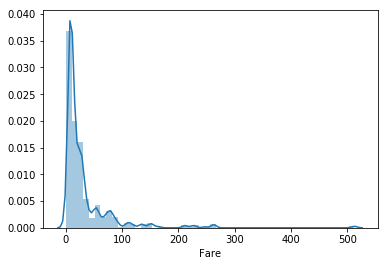

In [14]:
import seaborn as sns

sns.distplot(df.loc['train']['Fare'])

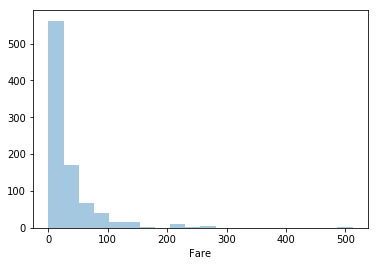

In [15]:
sns.distplot(df.loc['train']['Fare'], 
             kde=False,
             bins=20)

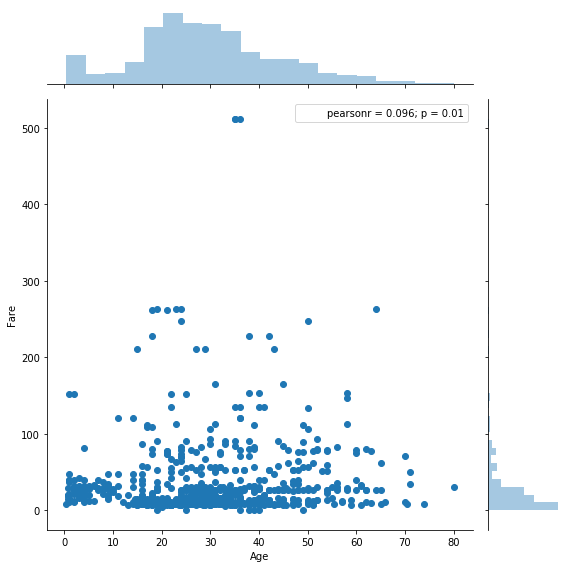

In [16]:
sns.jointplot(x='Age',
              y='Fare',
              data=df.loc['train'],
              size=8)

La funzione *stripplot* è uno *scatterplot* (realizzato qui sopra con la funzione *jointplot*) in cui uno degli attributi è categorico.

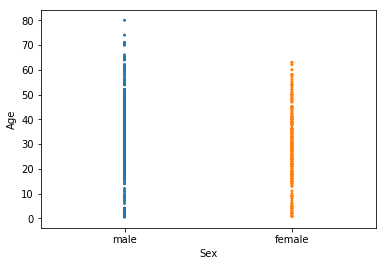

In [17]:
sns.stripplot(x='Sex',
              y='Age',
              data=df.loc['train'],
              size=3)

Attraverso l'argomento *hue*, le funzioni di seaborn permettono di "colorare" i grafici in base al valore di una feature categorica.

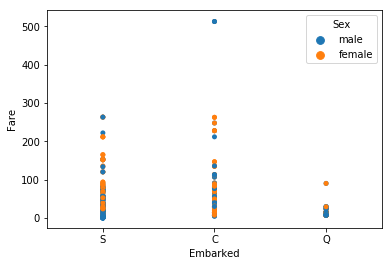

In [18]:
sns.stripplot(x='Embarked',
              y='Fare',
              hue='Sex',
              data=df.loc['train'],
              size=5)

La funzione *factorplot* realizza uno scatterplot *condizionale*.

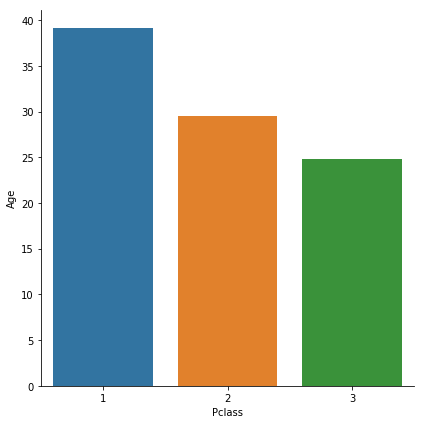

In [20]:
sns.factorplot('Pclass',
               'Age',
               data=df,
               kind='bar',
               size=6,
               ci=None,
               legend_out=False)

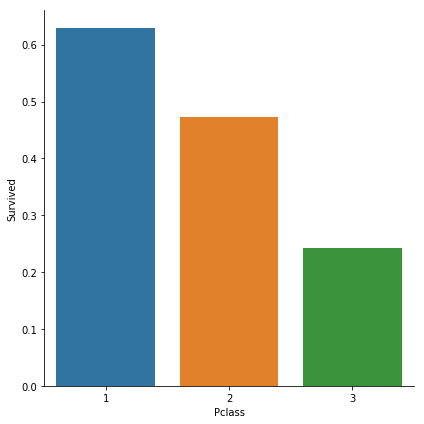

In [21]:
sns.factorplot('Pclass',
               'Survived',
               data=df,
               kind='bar',
               size=6,
               ci=None,
               legend_out=False)

Anche factorplot può essere colorato tramite l'argomento hue.

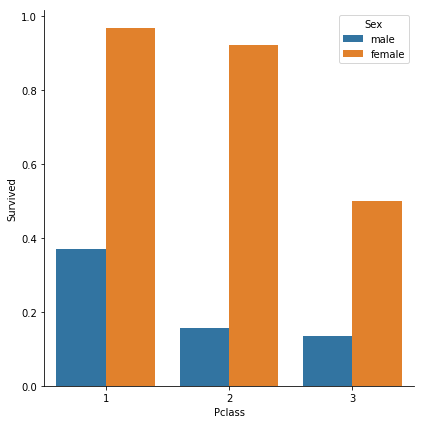

In [23]:
sns.factorplot('Pclass',
               'Survived',
               hue='Sex',
               data=df,
               kind='bar',
               size=6,
               ci=None,
               legend_out=False)

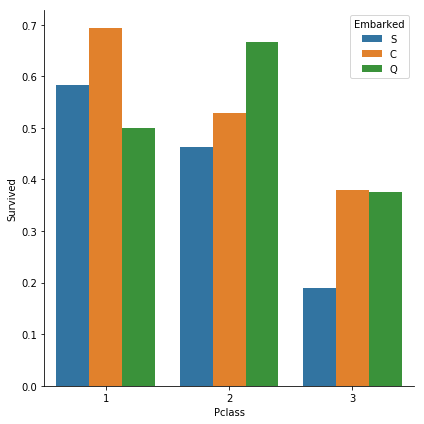

In [24]:
sns.factorplot('Pclass',
               'Survived',
               hue='Embarked',
               data=df,
               kind='bar',
               size=6,
               ci=None,
               legend_out=False)

Anche pandas offre qualche strumento utile per analizzare i dati. La funzione *describe* mostra qualche statistica di una Series.

In [25]:
df.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

La funzione *value_counts* costruisce l'istogramma di occorrenze di valori in una Series.

In [26]:
df.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [27]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

---

La sottomissione "base" della competizione Kaggle Titanic si chiama *gender_submission*: il modello assegna la classe 1 (che indica la sopravvivenza del passeggero) alle donne e la classe 0 agli uomini. Vogliamo capire quanto è accurato questo modello.

Vediamo intanto quanti maschi e femmine ci sono nel training set, e qual è la probabilità di sopravvivenza dei due gruppi.

In [26]:
df.loc['train'].shape

(891, 11)

In [27]:
df.loc['train'].Sex.value_counts() / df.loc['train'].shape[0]

male      0.647587
female    0.352413
Name: Sex, dtype: float64

Usiamo la funzione *groupby* per organizzare un DataFrame in gruppi.

In particolare:
- raggruppiamo il training set sulla colonna *Sex*
- estraiamo, da entrambi i gruppi, la colonna *Survived*, sotto forma di Series
- **Attenzione**: per ognuna delle Series associate ad un gruppo (es: le femmine), eseguo un'operazione aggregata, per esempio la media *mean*
- otteniamo la probabilità di sopravvivenza di ogni gruppo, cioè femmine e maschi.

In [28]:
df.loc['train'].groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

**Domanda**: quale sarà l'accuratezza del modello *gender* sul training set?

pandas può essere usato per costruire nuove colonne (feature) a partire da quelle esistenti. Ecco un paio di esempi.

In [29]:
df['Title'] = df['Name'].apply(lambda name: name[name.index(',') + 2 : name.index('.')])
df['LastName'] = df['Name'].apply(lambda name: name[0:name.index(',')])
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [30]:
df.iloc[:3]

Survived  Pclass  \
      PassengerId                     
train 1                 0.0       3   
      2                 1.0       1   
      3                 1.0       3   

                                                                Name     Sex  \
      PassengerId                                                              
train 1                                      Braund, Mr. Owen Harris    male   
      2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
      3                                       Heikkinen, Miss. Laina  female   

                    Age  SibSp  Parch            Ticket     Fare Cabin  \
      PassengerId                                                        
train 1            22.0      1      0         A/5 21171   7.2500   NaN   
      2            38.0      1      0          PC 17599  71.2833   C85   
      3            26.0      0      0  STON/O2. 3101282   7.9250   NaN   

                  Embarked Title   LastName  FamilySize  
      PassengerId                                        
train 1                  S    Mr     Braund           2  
      2                  C   Mrs    Cumings           2  
      3                  S  Miss  Heikkinen           1

Qui sopra, la funzione lambda specificata dentro *apply* viene applicata a tutti gli elementi della colonna/Series *Name*.

In [31]:
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
the Countess      1
Don               1
Dona              1
Lady              1
Mme               1
Sir               1
Capt              1
Name: Title, dtype: int64

Filtrando i dati del dataset/DataFrame con la sintassi
        
        df[condition(df)]
        
vediamo se la Contessa è sopravvissuta.

In [32]:
df[df.Title=='the Countess'].Survived

       PassengerId
train  760            1.0
Name: Survived, dtype: float64

Combiniamo tutto quello che abbiamo visto finora. Vogliamo calcolare la media della dimensione del nucleo familiare (*FamilySize*), al variare della classe di viaggio (*Pclass*).

In particolare:
- raggruppo per classe di viaggio
- estraggo la colonna FamilySize
- per ognuna delle Series associate ad un gruppo (es: la $1^a$ classe), eseguo un'operazione aggregata, per esempio la somma e il conto dei valori.

Quindi, apply applicherà la funzione lambda per ogni gruppo (e Series di valori ad esso associata).

In [33]:
df.groupby(df.Pclass).FamilySize.apply(lambda x : x.sum()/x.count())

Pclass
1    1.801858
2    1.761733
3    1.968970
Name: FamilySize, dtype: float64

Quanto sopra è equivalente ad applicare direttamente la media (come abbiamo fatto in precedenza con la probabilità di sopravvivenza di maschi e femmine).

In [34]:
df.groupby(df.Pclass).FamilySize.mean()

Pclass
1    1.801858
2    1.761733
3    1.968970
Name: FamilySize, dtype: float64

Se le operazioni aggregate da fare su ogni gruppo sono più elaborate, si usano apply e una funzione lambda, come nell'esempio precedente.

Passiamo alla gestione dei dati mancanti. Per esempio, per due passeggeri (entrambi nel training set) manca l'informazione del porto di imbarco, *Embarked*.

In [35]:
df.Embarked.isna().sum()#somma di valori booleani

2

In [36]:
df[df.Embarked.isna()]

Survived  Pclass  \
      PassengerId                     
train 62                1.0       1   
      830               1.0       1   

                                                        Name     Sex   Age  \
      PassengerId                                                            
train 62                                 Icard, Miss. Amelie  female  38.0   
      830          Stone, Mrs. George Nelson (Martha Evelyn)  female  62.0   

                   SibSp  Parch  Ticket  Fare Cabin Embarked Title LastName  \
      PassengerId                                                             
train 62               0      0  113572  80.0   B28      NaN  Miss    Icard   
      830              0      0  113572  80.0   B28      NaN   Mrs    Stone   

                   FamilySize  
      PassengerId              
train 62                    1  
      830                   1

Calcoliamo il valore più frequente per la colonna Embarked, su entrambi i set.

In [37]:
df.loc['train'].Embarked.mode()#attenzione: la moda restituisce un vettore di valori, per gestire i tie

0    S
dtype: object

In [38]:
df.loc['train'].Embarked.mode()[0], df.loc['test'].Embarked.mode()[0]

('S', 'S')

Posso usare questo valore per riempire i due vuoti con la funzione *fillna*.

In [39]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)

Controlliamo di aver gestito correttamente i due dati mancanti.

In [40]:
df.Embarked.isna().sum()

0

In [41]:
df[df.Name.isin(['Icard, Miss. Amelie',
                 'Stone, Mrs. George Nelson (Martha Evelyn)'])].Embarked

       PassengerId
train  62             S
       830            S
Name: Embarked, dtype: object

Quali altri valori mancano?

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 1) to (test, 1309)
Data columns (total 14 columns):
Survived      891 non-null float64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1308 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Title         1309 non-null object
LastName      1309 non-null object
FamilySize    1309 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 157.4+ KB


Manca ad esempio un valore della colonna *Fare*, vediamo dove.

In [43]:
df[df.Fare.isna()]

,,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize
,PassengerId,,,,,,,,,,,,,,
test,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,Storey,1


Questa mancanza è delicata, perchè si tratta del test set: scartare il dato equivarrebbe a sbagliarlo. Proviamo a riempirlo.

In [44]:
#df.Fare.fillna(df.Fare.mean(), inplace=True)

Proviamo a fare di meglio, a partire dal significato della feature. Da cosa può dipendere il prezzo del biglietto? 

Per esempio, potrei associare a Mr. Storey un prezzo del biglietto congruo alla sua classe di viaggio e porto di imbarco. Calcoliamo il prezzo medio del biglietto sul sottogruppo di Mr. Storey.

In [45]:
df[(df.Pclass==3) & (df.Embarked=='S')].Fare.mean()

14.435422064777338

Per ripetere il calcolo qui sopra su *ognuno* dei sottogruppi possibili delle colonne (Pclass, Embarked), posso usare un groupby.

In [46]:
df.groupby(['Pclass', 'Embarked']).Fare.mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.235825
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [47]:
df.groupby(['Pclass', 'Embarked']).Fare.mean()[3]['S']

14.435422064777338

Quindi, posso usare un fillna su ogni gruppo, in particolare su quello di Mr. Storey. 

In dettaglio, su ognuna delle Series (contenente prezzi di biglietto) associate ai gruppi, applico la funzione fillna, inserendo la media del gruppo.

In [48]:
df.Fare = df.groupby(['Pclass', 'Embarked']).Fare.apply(lambda x : x.fillna(x.mean()))#media del gruppo

Accertiamoci che Mr. Storey sia stato trattato correttamente.

In [49]:
df[df.Name=='Storey, Mr. Thomas']

,,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize
,PassengerId,,,,,,,,,,,,,,
test,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,14.435422,NaN,S,Mr,Storey,1


Se voglio fare tutto in modo perfettamente "legale", faccio la media dei soli prezzi del biglietto (per gruppo) dei passeggeri del training set.

In [50]:
df.loc['train'].groupby(['Pclass', 'Embarked']).Fare.mean()[3]['S']

14.64408300283288

All'interno della la funzione lambda, attraverso

        x.loc['train']
        
estraggo dalle Series di ogni gruppo solo i prezzi del biglietto dei passeggeri del training set. Utilizzerò la media di questo sottinsieme per riempire il valore mancante (in ogni gruppo).

In [51]:
df.Fare = df.groupby(['Pclass', 'Embarked']).Fare.apply(lambda x : x.fillna(x.loc['train'].mean()))#media del gruppo

---

Per analizzare graficamente la dipendenza del prezzo da altre caratteristiche, come l'età e il sesso, possiamo usare *pairplot* di seaborn: https://seaborn.pydata.org/generated/seaborn.pairplot.html.

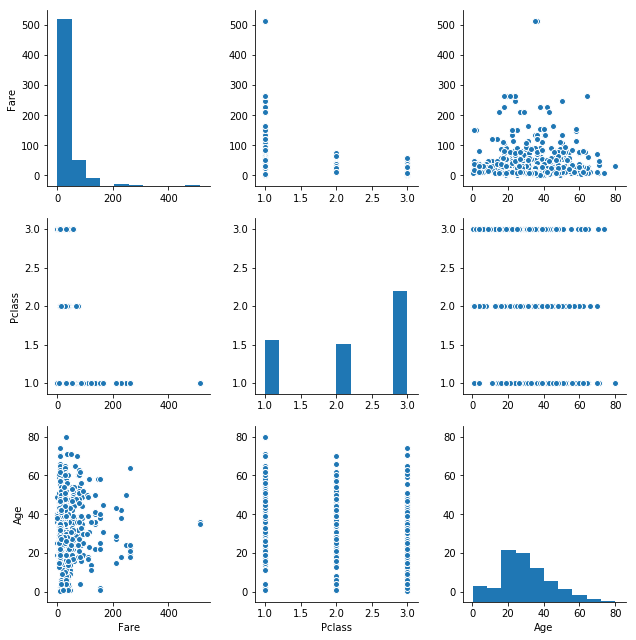

In [52]:
sns.pairplot(df.loc['train'][['Fare', 'Pclass', 'Age']].dropna(),
             size=3)

Anche pairplot permette di colorare in base ad attributi categorici.

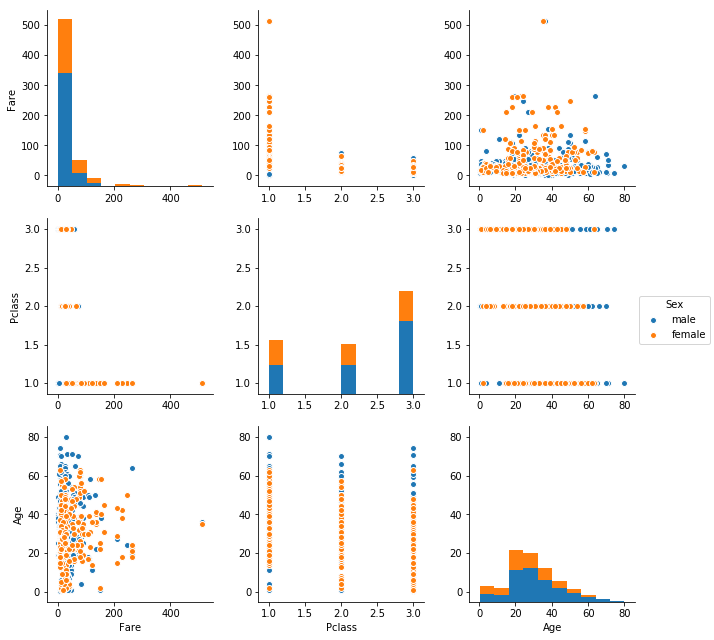

In [53]:
sns.pairplot(df.loc['train'][['Fare', 'Pclass', 'Age', 'Sex']].dropna(),
             size=3,
             hue='Sex')

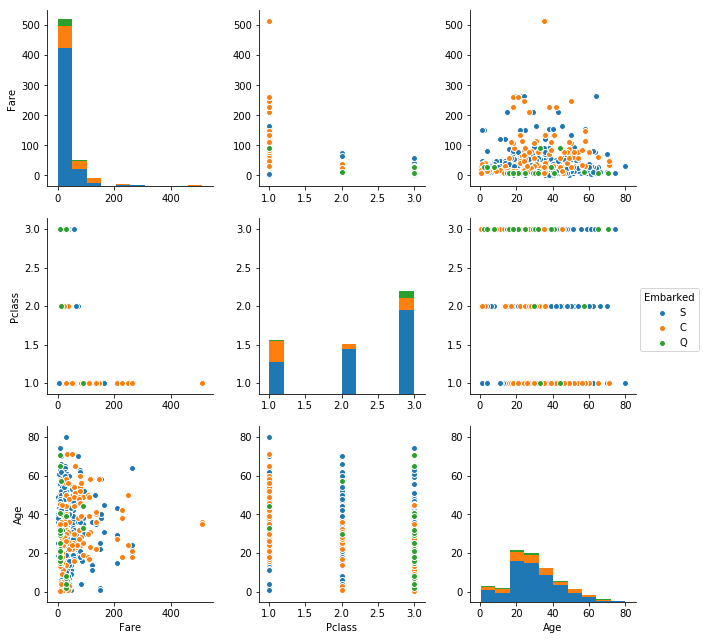

In [54]:
sns.pairplot(df.loc['train'][['Fare', 'Pclass', 'Age', 'Embarked']].dropna(),
             size=3,
             hue='Embarked')

Quali altri valori mancati dobbiamo ancora gestire?

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1309 entries, (train, 1) to (test, 1309)
Data columns (total 14 columns):
Survived      891 non-null float64
Pclass        1309 non-null int64
Name          1309 non-null object
Sex           1309 non-null object
Age           1046 non-null float64
SibSp         1309 non-null int64
Parch         1309 non-null int64
Ticket        1309 non-null object
Fare          1309 non-null float64
Cabin         295 non-null object
Embarked      1309 non-null object
Title         1309 non-null object
LastName      1309 non-null object
FamilySize    1309 non-null int64
dtypes: float64(3), int64(4), object(7)
memory usage: 157.4+ KB


Per esempio, l'età.

In [56]:
df_train.Age.isna().sum(), df_test.Age.isna().sum()

(177, 86)

Vediamo un altro esempio di riempimento. Calcoliamo l'età mediana per ogni *Title*.

In [57]:
df.groupby('Title').Age.median()

Title
Capt            70.0
Col             54.5
Don             40.0
Dona            39.0
Dr              49.0
Jonkheer        38.0
Lady            48.0
Major           48.5
Master           4.0
Miss            22.0
Mlle            24.0
Mme             24.0
Mr              29.0
Mrs             35.5
Ms              28.0
Rev             41.5
Sir             49.0
the Countess    33.0
Name: Age, dtype: float64

Costruiamo un DataFrame accessorio contenente questi valori. Per convenienza, rinominiamo la colonna derivata.

In [58]:
median_age_by_title = pd.DataFrame(df.groupby('Title').Age.median())#volendo, solo sul training set
median_age_by_title.rename(columns = {'Age': 'MedianAgeByTitle'}, inplace=True)

In [59]:
median_age_by_title

,MedianAgeByTitle
Title,
Capt,70.0
Col,54.5
Don,40.0
Dona,39.0
Dr,49.0
Jonkheer,38.0
Lady,48.0
Major,48.5
Master,4.0


Adesso facciamo il *merge* (simile ad un'operazione *join* su database), usando la colonna Title come collegamento.

In [60]:
df = df.merge(median_age_by_title, left_on='Title', right_index=True)

In [61]:
df.head()

Survived  Pclass                            Name   Sex  \
      PassengerId                                                           
train 1                 0.0       3         Braund, Mr. Owen Harris  male   
      5                 0.0       3        Allen, Mr. William Henry  male   
      6                 0.0       3                Moran, Mr. James  male   
      7                 0.0       1         McCarthy, Mr. Timothy J  male   
      13                0.0       3  Saundercock, Mr. William Henry  male   

                    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  \
      PassengerId                                                          
train 1            22.0      1      0  A/5 21171   7.2500   NaN        S   
      5            35.0      0      0     373450   8.0500   NaN        S   
      6             NaN      0      0     330877   8.4583   NaN        Q   
      7            54.0      0      0      17463  51.8625   E46        S   
      13           20.0      0      0  A/5. 2151   8.0500   NaN        S   

                  Title     LastName  FamilySize  MedianAgeByTitle  
      PassengerId                                                   
train 1              Mr       Braund           2              29.0  
      5              Mr        Allen           1              29.0  
      6              Mr        Moran           1              29.0  
      7              Mr     McCarthy           1              29.0  
      13             Mr  Saundercock           1              29.0

Prendiamo due passeggeri a cui manca l'informazione sull'età, un *Mr* e un *Dr*.

In [62]:
df[(df.Age.isna()) & (df.Title=='Mr')][:1]

,,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,MedianAgeByTitle
,PassengerId,,,,,,,,,,,,,,,
train,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr,Moran,1,29.0


In [63]:
df[(df.Age.isna()) & (df.Title=='Dr')][:1]

,,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,LastName,FamilySize,MedianAgeByTitle
,PassengerId,,,,,,,,,,,,,,,
train,767,0.0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,Dr,Brewe,1,49.0


Riempiamo i valori mancanti utilizzando la nuova colonna.

In [64]:
df.Age.fillna(df.MedianAgeByTitle, inplace=True)

E controlliamo l'effetto su Mr. Moran e il Dr. Brewe.

In [65]:
df[df.Name.isin(['Moran, Mr. James',
                 'Brewe, Dr. Arthur Jackson'])]

Survived  Pclass                       Name   Sex   Age  \
      PassengerId                                                            
train 6                 0.0       3           Moran, Mr. James  male  29.0   
      767               0.0       1  Brewe, Dr. Arthur Jackson  male  49.0   

                   SibSp  Parch  Ticket     Fare Cabin Embarked Title  \
      PassengerId                                                       
train 6                0      0  330877   8.4583   NaN        Q    Mr   
      767              0      0  112379  39.6000   NaN        C    Dr   

                  LastName  FamilySize  MedianAgeByTitle  
      PassengerId                                         
train 6              Moran           1              29.0  
      767            Brewe           1              49.0

Volendo, possiamo cancellare la colonna di supporto.

In [66]:
df.drop(columns=['MedianAgeByTitle'], inplace=True)

In [67]:
'MedianAgeByTitle' in df.columns

False

sklearn_pandas
===
Supponiamo adesso di voler utilizzare sklearn per la codifica delle feature e per l'addestramento.

La libreria *sklearn_pandas* (si installa con pip) è uno strumento molto utile per passare da un DataFrame a qualcosa di utilizzabile con sklearn.

Usiamo lo strumento *DataFrameMapper* per utilizzare le funzioni di preprocessing di sklearn direttamente su un DataFrame pandas.

In [72]:
from sklearn_pandas import DataFrameMapper

Vediamo come funziona DataFrameMapper con un dataset giocattolo.

In [73]:
train = pd.DataFrame({'pet':      ['cat', 'dog', 'dog', 'fish', 'cat', 'dog', 'cat', 'fish'],
                      'children': [4., 6, 3, 3, 2, 3, 5, 4],
                      'salary':   [90., 24, 44, 27, 32, 59, 36, 27]})

test = pd.DataFrame({'pet':      ['dog', 'cat', 'fish'],
                     'children': [1.   ,  2   , 1.6],
                     'salary':   [10.0 ,  5   , 100]})

Ho costruito due DataFrame, uno per il training (8 righe/esempi) e uno per il test set (3 righe/esempi). 

Vediamo come sono fatti.

In [74]:
train

,pet,children,salary
0,cat,4.0,90.0
1,dog,6.0,24.0
2,dog,3.0,44.0
3,fish,3.0,27.0
4,cat,2.0,32.0
5,dog,3.0,59.0
6,cat,5.0,36.0
7,fish,4.0,27.0


In [75]:
test

,pet,children,salary
0,dog,1.0,10.0
1,cat,2.0,5.0
2,fish,1.6,100.0


Ciascuno di essi ha 3 feature, una categorica e due numeriche. Come le possiamo codificare/normalizzare?

Importiamo qualche oggetto di preprocessing di sklearn.

In [76]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler

C'è una sottile ma importante differenza tra *LabelBinarizer* e gli altri due oggetti. Il primo, infatti, è costruito per operare su array NumPy monodimensionali (le label), mentre gli altri si aspettano dei vettori colonna (le feature), cioè degli array NumPy con due dimensioni.

Ovviamente è possibile usare un LabelBinarizer su di una feature, ma dobbiamo gestire con attenzione la dimensione del relativo array.

Questo si riflette sull'utilizzo di DataFrameMapper: qui sotto, costruiamo un mapper specificando, una ad una, tutte le trasformazioni che vogliamo applicare alle feature. Quelle che si aspettano un vettore colonna, avranno il nome della colonna/feature corrispondente tra parentesi quadre (in modo da "creare" l'array bidimensionale che la trasformazione si aspetta).

In [77]:
mapper = DataFrameMapper([('pet',        LabelBinarizer()),
                          (['children'], StandardScaler()),
                          (['salary'],   MinMaxScaler())])

L'utilizzo del mapper è uguale a quello di un qualsiasi oggetto di preprocessing di sklearn, ed espone le funzioni fit, transform e fit_transfom.

Di default, il mapper restituisce un array NumPy, pronto ad essere usato per l'apprendimento.

In [78]:
mapper.fit_transform(train)

array([[ 1.        ,  0.        ,  0.        ,  0.20851441,  1.        ],
       [ 0.        ,  1.        ,  0.        ,  1.87662973,  0.        ],
       [ 0.        ,  1.        ,  0.        , -0.62554324,  0.3030303 ],
       [ 0.        ,  0.        ,  1.        , -0.62554324,  0.04545455],
       [ 1.        ,  0.        ,  0.        , -1.4596009 ,  0.12121212],
       [ 0.        ,  1.        ,  0.        , -0.62554324,  0.53030303],
       [ 1.        ,  0.        ,  0.        ,  1.04257207,  0.18181818],
       [ 0.        ,  0.        ,  1.        ,  0.20851441,  0.04545455]])

In [79]:
mapper.transform(test)

array([[ 0.        ,  1.        ,  0.        , -2.29365855, -0.21212121],
       [ 1.        ,  0.        ,  0.        , -1.4596009 , -0.28787879],
       [ 0.        ,  0.        ,  1.        , -1.79322396,  1.15151515]])

Se si vuole ottenere un DataFrame in uscita dal mapper, si può specificarlo attraverso l'argomento *df_out*.

In [80]:
mapper = DataFrameMapper([('pet',        LabelBinarizer()),
                          (['children'], StandardScaler()),
                          (['salary'],   MinMaxScaler())], df_out=True)

In [81]:
mapper.fit_transform(train)

,pet_cat,pet_dog,pet_fish,children,salary
0,1,0,0,0.208514,1.000000
1,0,1,0,1.876630,0.000000
2,0,1,0,-0.625543,0.303030
3,0,0,1,-0.625543,0.045455
4,1,0,0,-1.459601,0.121212
5,0,1,0,-0.625543,0.530303
6,1,0,0,1.042572,0.181818
7,0,0,1,0.208514,0.045455


Infine, si può indicare una trasformazione di default (per esempio, nessuna), utilizzando l'argomento *default* del mapper.

In [82]:
mapper = DataFrameMapper([('pet', LabelBinarizer())],
                         df_out=True,
                         default=None)#si applica a tutte le feature per cui non ho specificato diversamente

In [83]:
mapper.fit_transform(train)

,pet_cat,pet_dog,pet_fish,children,salary
0,1,0,0,4.0,90.0
1,0,1,0,6.0,24.0
2,0,1,0,3.0,44.0
3,0,0,1,3.0,27.0
4,1,0,0,2.0,32.0
5,0,1,0,3.0,59.0
6,1,0,0,5.0,36.0
7,0,0,1,4.0,27.0


In [84]:
mapper.transform(test)

,pet_cat,pet_dog,pet_fish,children,salary
0,0,1,0,1.0,10.0
1,1,0,0,2.0,5.0
2,0,0,1,1.6,100.0


<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>